# Analysis of Absenteeism at work

### 📑 Table of Contents

1. [Overview](#-overview)
2. [Objective](#-objective)
3. [Data Preprocessing](#-phase-1-data-preprocessing)  
   - [Initial Dataset Columns](#-initial-dataset-columns)  
   - [Column Renaming](#-column-renaming)  
   - [Reason for Absence Categorization](#-reason-for-absence-categorization)  
   - [Handling Dates & Creating Time Features](#-handling-dates--creating-time-features)  
   - [Final Column Reordering](#-final-column-reordering)  
4. [Exploratory Data Analysis (EDA)](#-phase-15-exploratory-data-analysis-eda)  
   - [Distribution of Absenteeism Time](#-distribution-of-absenteeism-time)  
   - [Absenteeism by Reason for Absence](#-absenteeism-by-reason-for-absence)  
   - [Absenteeism by Weekday and Month](#-absenteeism-by-weekday-and-month)  
   - [Absenteeism by Demographics](#-absenteeism-by-demographics)  
   - [Correlation Matrix](#-correlation-matrix)  
5. [Logistic Regression Modeling](#-phase-2-logistic-regression-modeling)  
   - [Target Definition](#-target-definition)  
   - [Feature Scaling](#-feature-scaling)  
   - [Train-Test Split](#-train-test-split)  
   - [Model Training](#-model-training)  
   - [Evaluation Metrics](#-evaluation-metrics)  
6. [Deployment Preparation](#-phase-3-deployment-preparation)  
   - [Predicted Probabilities](#-predicted-probabilities)  
   - [Saving Model with Pickle](#-saving-model-with-pickle)  



## 📌 Overview

This project involves the analysis of a simplified absenteeism dataset to understand patterns that may contribute to employee absenteeism and to build a predictive model that can classify whether an employee is likely to be absent from work or not.

Absenteeism has a measurable impact on productivity and workforce planning. Through this analysis, we aim to assist organizations in identifying potential risk factors that contribute to employee absence and take preemptive actions.

The dataset used in this project is a **reduced version** of the [UCI Absenteeism at Work dataset](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) maintained by the University of California, Irvine's Machine Learning Repository. While the original dataset contains 740 entries and 21 features, we use a subset of 700 records and 12 selected attributes for focused analysis and modeling.

---

## 🎯 Objective

The **main goal** of this project is to:
> **Build a logistic regression model to classify whether an employee will be absent from work (i.e., Absenteeism Time > 0).**

We will:
- Convert the target column `Absenteeism Time in Hours` into a binary outcome (0 = not absent, 1 = absent).
- Analyze the relationships between absenteeism and available predictors (age, distance, workload, etc.).
- Prepare the features using scaling and transformations where necessary.
- Train, evaluate, and refine a logistic regression model.
- Save the final model and any preprocessing steps for deployment or future use.




---

## 🧾 Attribute Information

The original **UCI Absenteeism at Work** dataset contains 740 records and 21 features (excluding the target). Below is the full list of features:

- **Individual identification (ID)**
- **Reason for absence**  
  *Attested by the International Code of Diseases (ICD), categorized as:*

    1. Certain infectious and parasitic diseases  
    2. Neoplasms  
    3. Diseases of the blood and immune disorders  
    4. Endocrine, nutritional and metabolic diseases  
    5. Mental and behavioural disorders  
    6. Diseases of the nervous system  
    7. Diseases of the eye and adnexa  
    8. Diseases of the ear and mastoid process  
    9. Diseases of the circulatory system  
    10. Diseases of the respiratory system  
    11. Diseases of the digestive system  
    12. Diseases of the skin and subcutaneous tissue  
    13. Diseases of the musculoskeletal system and connective tissue  
    14. Diseases of the genitourinary system  
    15. Pregnancy, childbirth and the puerperium  
    16. Perinatal conditions  
    17. Congenital malformations and chromosomal abnormalities  
    18. Abnormal clinical/lab findings not elsewhere classified  
    19. Injury and poisoning  
    20. External causes of morbidity and mortality  
    21. Health service encounters

     22–28: Other (follow-up, consultation, donation, etc.)

- Month of absence  
- Day of the week (2=Monday to 6=Friday)  
- Seasons (1=summer to 4=spring)  
- Transportation expense  
- Distance from Residence to Work  
- Service time  
- Age  
- Work load Average/day  
- Hit target  
- Disciplinary failure (1=yes, 0=no)  
- Education (1=high school to 4=doctorate)  
- Number of sons  
- Social drinker (1=yes, 0=no)  
- Social smoker (1=yes, 0=no)  
- Number of pets  
- Weight, Height, Body Mass Index  
- **Absenteeism time in hours** *(Target)*

---

## 📌 Columns in Our Dataset

Our dataset is a reduced version of the above, containing 12 key attributes:

- `ID`
- `Reason for Absence`
- `Date`
- `Transportation Expense`
- `Distance to Work`
- `Age`
- `Daily Work Load Average`
- `Body Mass Index`
- `Education`
- `Children`
- `Pets`
- `Absenteeism Time in Hours` *(Target)*

This subset retains key demographic and logistical features to help predict absenteeism likelihood in a binary classification format.

---


### 🔍 Data Preprocessing?

Before we dive into modeling, it's crucial to clean and organize the data. Preprocessing ensures that the dataset is in a structured and consistent format suitable for machine learning. The main goals of preprocessing in this project include:

- 🔄 **Format conversion**: Transform raw values into structured formats that can be interpreted by models (e.g., categorizing absence reasons).
- ❓ **Missing value handling**: Identify and deal with missing or invalid entries.
- 🧹 **Noise reduction**: Remove irrelevant or redundant features (e.g., `ID`).
- 🧠 **Feature engineering**: Create meaningful features that better represent the underlying patterns in the data (e.g., creating binary columns from absence reasons).
- 📏 **Standardization**: Ensure numerical features are scaled appropriately before training models.

These steps help us build a robust and accurate logistic regression model in the following phases.


In [2]:

# Phase 1: Data Preprocessing

import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
df = pd.read_csv("Absenteeism_data.csv")
df.head()


,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Month of absence'] = df['Date'].dt.month
df['Day of the week'] = df['Date'].dt.weekday + 1  # Monday=1, Sunday=7

In [5]:
df.head(2)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month of absence,Day of the week
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,2
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,2


Now I check for null values in the dataset:

In [6]:
print("There are " + ("some" if df.isnull().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.


There are no missing values in the dataset. Now we have to check the invalid data in the dataset. 

In [7]:
# summary of data
df.describe()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month of absence,Day of the week
count,700.000000,700.000000,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000
mean,17.951429,19.411429,2016-12-31 00:45:15.428571392,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429,6.36000,3.011429
min,1.000000,0.000000,2015-07-06 00:00:00,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000
25%,9.000000,13.000000,2016-03-27 06:00:00,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000,3.00000,2.000000
50%,18.000000,23.000000,2016-12-19 00:00:00,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000,6.00000,3.000000
75%,28.000000,27.000000,2017-10-26 06:00:00,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000,10.00000,4.000000
max,36.000000,28.000000,2018-05-31 00:00:00,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000,12.00000,7.000000
std,11.028144,8.356292,NaN,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082,3.50501,1.480396


Now let's check *Reason of absence*.

In [8]:
len(df[df['Reason for Absence'] == 0]) # occurences with 'reason' = 0.

38

In [9]:
df[df['Reason for Absence'] == 0].describe() # summary of the subset of data having reason = 0

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month of absence,Day of the week
count,38.000000,38.0,38,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000
mean,18.578947,0.0,2016-10-15 23:22:06.315789568,251.921053,26.447368,39.210526,276.289632,28.052632,1.105263,1.394737,0.763158,0.0,7.973684,3.289474
min,1.000000,0.0,2015-07-14 00:00:00,118.000000,5.000000,28.000000,237.656000,21.000000,1.000000,0.000000,0.000000,0.0,3.000000,1.000000
25%,7.250000,0.0,2016-05-19 18:00:00,226.500000,15.250000,33.750000,244.387000,24.000000,1.000000,1.000000,0.000000,0.0,5.000000,2.000000
50%,18.500000,0.0,2016-10-10 00:00:00,247.000000,22.500000,39.000000,265.017000,25.000000,1.000000,1.000000,0.000000,0.0,9.000000,3.000000
75%,28.750000,0.0,2017-03-28 00:00:00,291.000000,35.750000,43.000000,284.647500,31.000000,1.000000,2.000000,1.000000,0.0,10.000000,4.000000
max,36.000000,0.0,2018-05-16 00:00:00,388.000000,51.000000,50.000000,378.884000,38.000000,3.000000,4.000000,5.000000,0.0,11.000000,7.000000
std,11.551604,0.0,NaN,80.653541,14.365306,7.293677,41.170167,5.462142,0.388307,1.103789,1.364298,0.0,2.726118,1.412452


I see that all the records having *reason = 0* also have *abs_hours = 0*. 
These records probably refers to cases of late work for less than an hour and so justification is not available. Considering these records into the analysis could be interesting and also useful for a company, so I keep them.


### 🔍 Exploratory Data Analysis

Sometimes simple plotting can help understanding how to proceed. Analyzing the distribution of *Absenteeism time in hours* and then will try to undestrand the relationships between the other features.

In [10]:
# make a copy of data 
df_eda = df.copy()

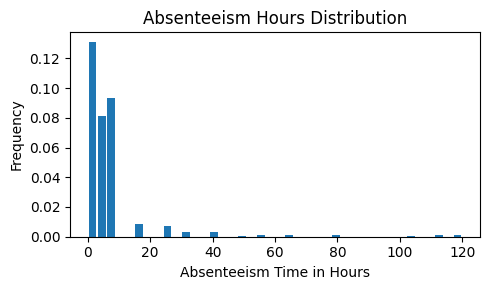

In [11]:
# Histogram of Absenteeism Time in Hours (Smaller Version)
bins = 40
fig, ax = plt.subplots(figsize=(5, 3))  # Smaller figure size
ax.hist(df_eda['Absenteeism Time in Hours'], bins=bins, rwidth=0.8, density=True)
ax.set_xlabel('Absenteeism Time in Hours')
ax.set_ylabel('Frequency')
ax.set_title('Absenteeism Hours Distribution')
plt.tight_layout()
plt.show()

Most employees are absent for short durations; longer absences are rare.

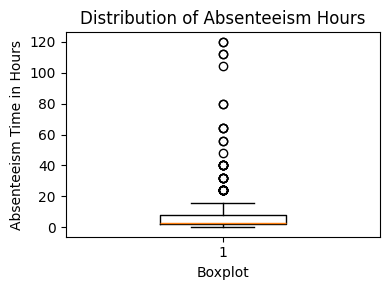

In [12]:
# Smaller boxplot of Absenteeism Time in Hours
plt.figure(figsize=(4, 3))  # width=4 inches, height=3 inches
plt.boxplot(df_eda['Absenteeism Time in Hours'], widths=0.4)
plt.ylabel('Absenteeism Time in Hours')
plt.xlabel('Boxplot')
plt.title('Distribution of Absenteeism Hours')
plt.tight_layout()
plt.show()

Shows a right-skewed distribution with a few high outliers.
Clearly, in *Abseteeism time in hours* there is a great presence of outliers. It seems there are few observations particularly unusual.

Text(0, 0.5, 'Frequency')

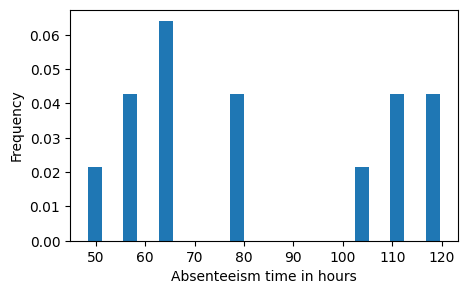

In [13]:
# Frequency of Absenteeism time for values grater than a week (40 hours). 
bins = 20
fig, ax = plt.subplots(figsize=(5, 3))
out = df_eda[df_eda['Absenteeism Time in Hours'] > 40]
ax.hist(out['Absenteeism Time in Hours'], bins, rwidth = 0.8, density = True)
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('Frequency')

The dataset is clearly unbalanced: the number of records of the classes can be too different.

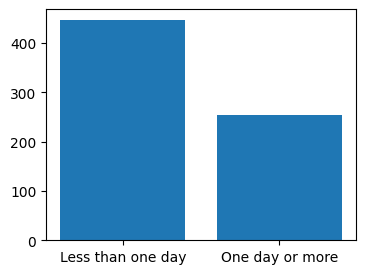

In [14]:
# Plotting absence 
plt.figure(figsize=(4, 3))
time = df_eda['Absenteeism Time in Hours']
hours = np.count_nonzero(time < 8)
days = np.count_nonzero(time >= 8)
x = np.array(['Less than one day', 'One day or more'])
y = np.array([hours, days])
plt.bar(x, y)
plt.show()

#### Reason and datatime

A very important feature is *Reason of absence*. Let's analyze which reasons are most related to absence.

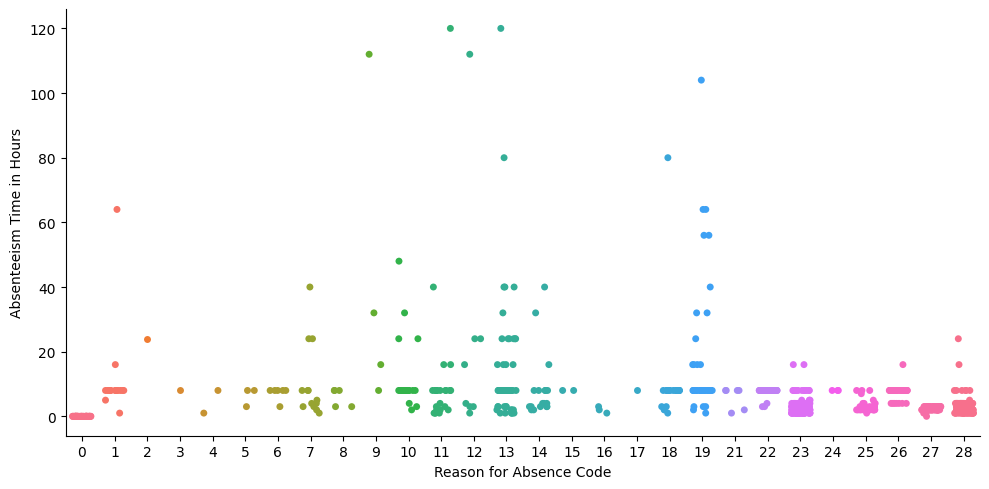

In [15]:
# Plot of Absenteeism Time in Hours by Reason for Absence
sns.catplot(
    x='Reason for Absence', 
    y='Absenteeism Time in Hours', 
    data=df_eda,                     # Assuming original dataframe with 'Reason for Absence'
    kind='strip',                    # to better visualize spread
    hue='Reason for Absence',        # Assign hue to enable palette
    palette='husl',                  # color palette (try 'Set1', 'Set2', 'husl', etc.)
    height=5,                        # height of the figure
    aspect=2,                        # width = height * aspect
    jitter=0.3,                      # amount of jitter (horizontal noise)
    legend=False                     # Hide redundant legend
).set_axis_labels("Reason for Absence Code", "Absenteeism Time in Hours")


### Understanding Reasons for Absence in the Dataset

**Reason Code = 0 → Mostly Late Arrivals**  
   - We had already noticed that when the *Reason for Absence* is `0` (i.e., *Not Available*), these entries typically refer to short delays or late arrivals.

**Reason Codes 22 to 28 → Not Illness-Related** 


   - Reasons 22–28 (non-medical) dominate short absences. Serious reasons lead to longer hours.
   - These reasons include **doctor check-ups**, **medical consultations**, or other **non-serious reasons**.

On the contrary, for absences of a day or more, the reason is often a serious medical problem.


In [16]:
df_eda.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month of absence,Day of the week
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,2
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,2
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,3
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,4
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,4


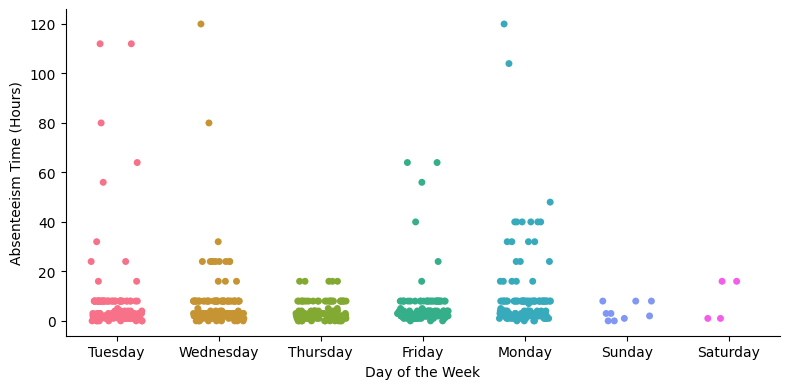

In [17]:
# DAY OF THE WEEK

# Map numeric day (1 = Monday, ..., 7 = Sunday) to weekday names
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
           5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df_eda['day_name'] = df_eda['Day of the week'].map(day_map)

# Plot
sns.catplot(
    x='day_name',
    y='Absenteeism Time in Hours',
    data=df_eda,
    kind='strip',
    hue='day_name',             
    palette='husl',
    legend=False,               
    height=4,
    aspect=2,
    jitter=0.25
).set_axis_labels("Day of the Week", "Absenteeism Time (Hours)")

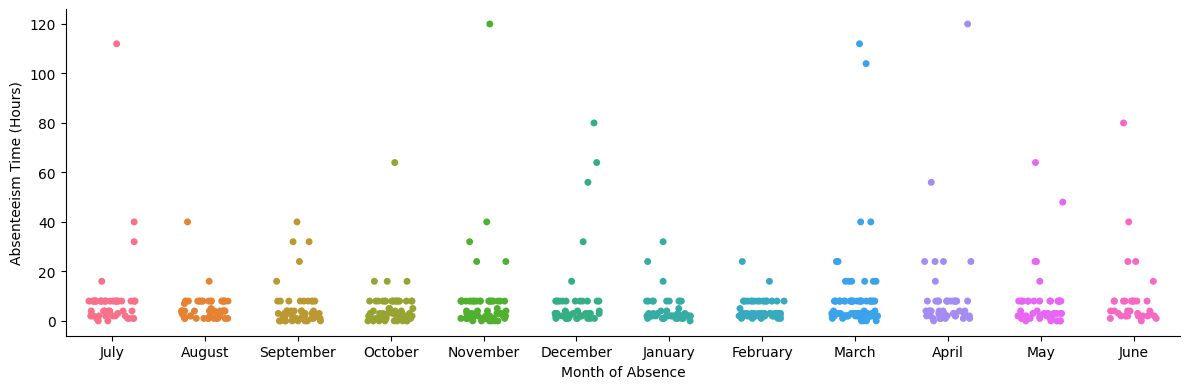

In [18]:
# MONTH OF ABSENCE
# Create a month map
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Map numeric month column to names
df_eda['month_name'] = df_eda['Month of absence'].map(month_map)

sns.catplot(
    x='month_name',
    y='Absenteeism Time in Hours',
    data=df_eda,
    kind='strip',
    hue='month_name',         
    palette='husl',
    legend=False,
    height=4,
    aspect=3,
    jitter=0.25
).set_axis_labels("Month of Absence", "Absenteeism Time (Hours)")


Absenteeism varies by weekday and month, possibly reflecting work stress or scheduling trends.

#### Personal and family

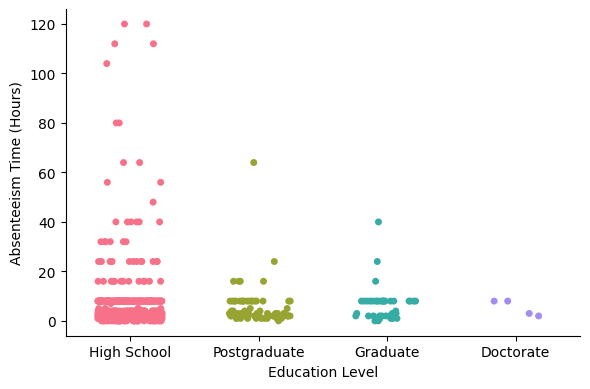

In [19]:
# EDUCATION 
# Optional mapping for better readability
education_map = {
    1: 'High School',
    2: 'Graduate',
    3: 'Postgraduate',
    4: 'Doctorate'
}

# Apply mapping to create a new column
df_eda['education_level'] = df_eda['Education'].map(education_map)

# Plot
sns.catplot(
    x='education_level',
    y='Absenteeism Time in Hours',
    hue='education_level',              
    data=df_eda,
    kind='strip',
    height=4,
    aspect=1.5,
    jitter=0.25,
    palette='husl',
    legend=False                        
).set_axis_labels("Education Level", "Absenteeism Time (Hours)")


In [20]:
# Employees per education
df_eda.groupby('Education')['ID'].nunique()

Education
1    27
2     4
3     3
4     1
Name: ID, dtype: int64

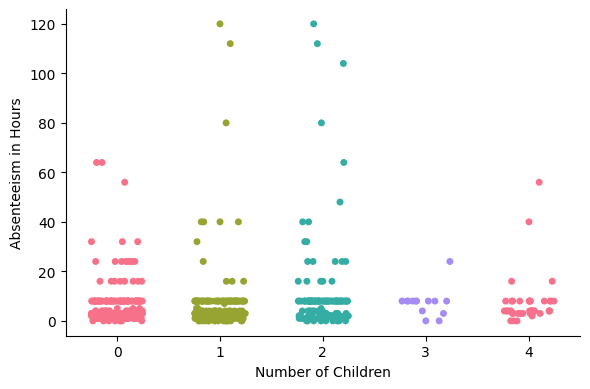

In [21]:
# Children
sns.catplot(
    x='Children',
    y='Absenteeism Time in Hours',
    hue='Children',                     
    data=df_eda,
    kind='strip',
    height=4,
    aspect=1.5,
    jitter=0.25,
    palette='husl',
    legend=False                    
).set_axis_labels("Number of Children", "Absenteeism in Hours")


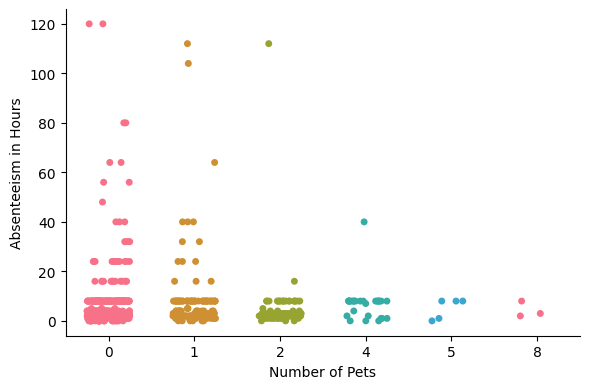

In [22]:
# Pets
sns.catplot(
    x='Pets',
    y='Absenteeism Time in Hours',
    hue='Pets',                     
    data=df_eda,
    kind='strip',
    height=4,
    aspect=1.5,
    jitter=0.25,
    palette='husl',
    legend=False                    
).set_axis_labels("Number of Pets", "Absenteeism in Hours")

### Correlation

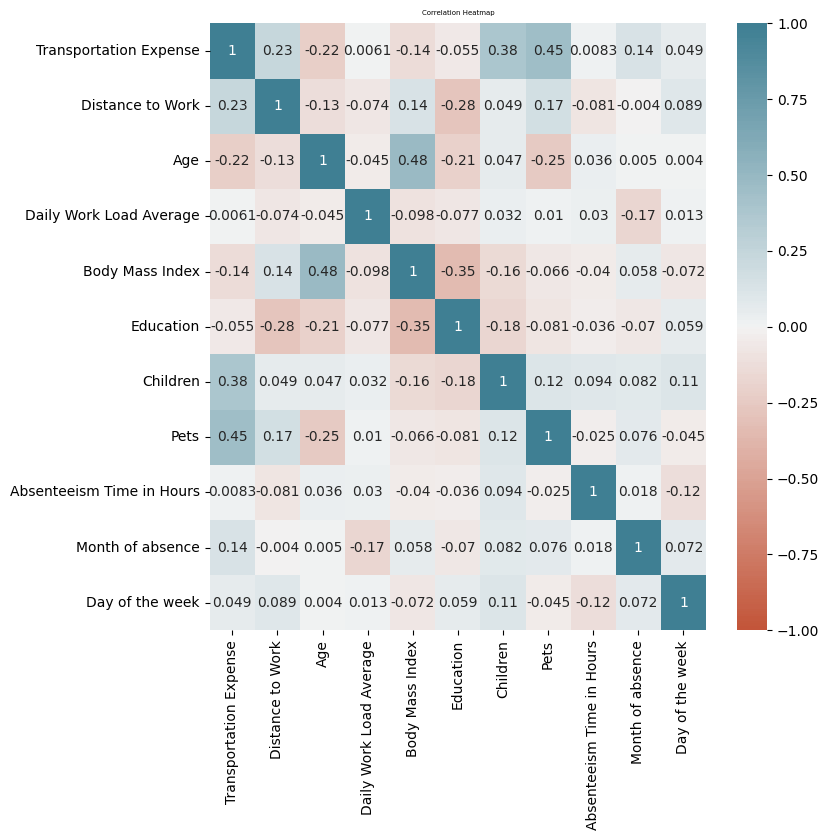

In [23]:
# Correlation matrix 
# with categorical columns removed and remaining numerical features normalized

df_num = df_eda.drop(columns=[
    'ID', 'Reason for Absence', 'Date', 
    'day_name', 'month_name', 'education_level'
])

# Normalize the numeric data (z-score normalization)
df_norm = (df_num - df_num.mean()) / df_num.std()

# Compute the correlation matrix
corr = df_norm.corr()

# Plot the heatmap
plt.figure(figsize=(8.5, 8.5))
sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
plt.title('Correlation Heatmap', fontsize=5)
plt.tight_layout()
plt.show()


## 🔍 Correlation Heatmap Summary

The correlation heatmap reveals some notable patterns:

- **BMI** is moderately correlated with **Age** and **Children**, indicating older individuals may have higher BMI and more children.
- **Transportation Expense** is positively correlated with **Distance to Work** and **Pets**, reflecting lifestyle or residential choices.
- **Education** shows negative correlations with **BMI**, **Distance**, and **Age** - suggesting more educated individuals tend to be younger, healthier, and live closer to work.

### 🎯 On Absenteeism:
- **Absenteeism Time in Hours** shows **weak correlations** with all features.
- Slight positive relation with **Children**; slight negative with **BMI** and **Distance**.
- No strong linear driver of absenteeism among numerical features.

📌 **Conclusion**: Absenteeism likely depends on **categorical features** or **combinations** of factors, not just single numeric variables.

Shows weak correlation with absenteeism; multivariate patterns likely more informative.


## Step 2: Data Preprocessing

Create reason type dummies from 'Reason for Absence'

In [24]:

# Group ICD codes into broader categories
reason_column = df['Reason for Absence']
reason_type_1 = reason_column.isin(range(1, 15)).astype(int)
reason_type_2 = reason_column.isin(range(15, 18)).astype(int)
reason_type_3 = reason_column.isin(range(18, 22)).astype(int)
reason_type_4 = reason_column.isin(range(22, 29)).astype(int)

# Concatenate new reason type columns to dataframe
df = pd.concat([df, reason_type_1.rename("Reason_1"),
                    reason_type_2.rename("Reason_2"),
                    reason_type_3.rename("Reason_3"),
                    reason_type_4.rename("Reason_4")], axis=1)

# Drop original Reason for Absence column
df = df.drop(['Reason for Absence'], axis = 1)

# Reorder Columns
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 
                          'Date', 'Month of absence', 'Day of the week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

df = df[column_names_reordered]

# Drop Date
df = df.drop(['Date'], axis = 1)

# Create a Checkpoint 
data_preprocessed = df.copy()
data_preprocessed

# View updated dataframe shape and columns
print("Updated dataset shape:", data_preprocessed.shape)
data_preprocessed.head()

Updated dataset shape: (700, 15)


,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,2,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,2,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,3,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,4,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,4,289,36,33,239.554,30,1,2,1,2


### 🎯 Creating the Target for Logistic Regression

To train a logistic regression model, we need a binary target (0 or 1).

We define "Excessive Absenteeism" using the **median** of the `Absenteeism Time in Hours` column. If an employee has been absent for **more than the median**, we label it as `1` (excessive); otherwise, we assign `0`.

This helps in keeping the dataset **balanced**, which is crucial for training classification models effectively. Had we used an arbitrary threshold (e.g., 8 hours), the classes might become imbalanced, hurting model performance.


In [26]:
# Compute the median of absenteeism hours
median_val = data_preprocessed['Absenteeism Time in Hours'].median()
print("Median Absenteeism Time (Hours):", median_val)

# Create binary targets based on median split
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > median_val, 1, 0)

# Add the new target column to the DataFrame
data_preprocessed['Excessive Absenteeism'] = targets

# Quick view of target distribution
data_preprocessed['Excessive Absenteeism'].value_counts()


Median Absenteeism Time (Hours): 3.0


Excessive Absenteeism
0    381
1    319
Name: count, dtype: int64

### 🧾 Target Distribution Visualization

To ensure our dataset is **balanced**, we visualize the distribution of the newly created `Excessive Absenteeism` target variable.

This helps us verify whether roughly half the data falls into each class (0 or 1), which is critical for training a fair and effective logistic regression model.


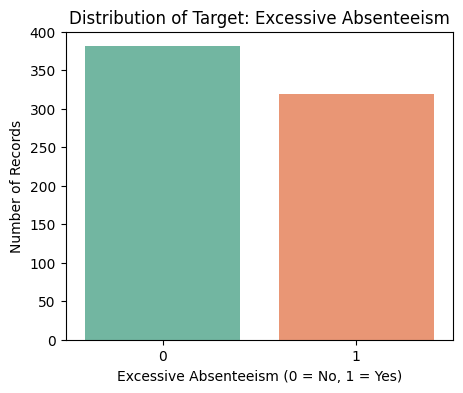

In [31]:
# Plot distribution of the target variable
plt.figure(figsize=(5, 4))
sns.countplot(
    x='Excessive Absenteeism',
    hue='Excessive Absenteeism',      # use x as hue
    data=data_preprocessed,
    palette='Set2',
    legend=False                      # suppress redundant legend
)
plt.title('Distribution of Target: Excessive Absenteeism')
plt.xlabel('Excessive Absenteeism (0 = No, 1 = Yes)')
plt.ylabel('Number of Records')
plt.show()



### 🔍 A Comment on the Targets

To evaluate whether our dataset is **balanced**, we calculate the proportion of observations labeled as `1` (i.e., employees showing excessive absenteeism).

A balanced target variable is important when training classification models like logistic regression, as it helps prevent model bias toward the majority class.

After checking the balance, we create a **checkpoint DataFrame** by dropping the original `Absenteeism Time in Hours` column (no longer needed for modeling). We also validate that the new DataFrame is a separate object and not just a reference.


In [32]:
# Check target balance: what % of observations are '1'
target_ratio = targets.sum() / targets.shape[0]
print("Proportion of 'Excessive Absenteeism' cases (1s):", round(target_ratio, 2))

# Create a checkpoint dataframe for modeling
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)

# Validate it's a true copy (not pointing to same object)
print("Checkpoint successful:", data_with_targets is not data_preprocessed)


Proportion of 'Excessive Absenteeism' cases (1s): 0.46
Checkpoint successful: True


In [33]:
data_with_targets.head(3)

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,2,289,36,33,239.554,30,1,2,1,1
1,0,0,0,0,7,2,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,3,179,51,38,239.554,31,1,0,0,0


### 🧮 Selecting Inputs for the Logistic Regression

To train a logistic regression model, we need to separate the features (inputs) from the target variable.

Since we already created the `Excessive Absenteeism` target in the last column of our dataset, we can simply select all columns **except the last one** to use as inputs.

We'll also verify the structure of the dataset and store the input features in a separate variable called `unscaled_inputs` for further processing like scaling.


In [34]:
# Check shape of dataset (rows, columns)
print("Shape of data with targets:", data_with_targets.shape)

# Preview feature columns (excluding the target)
print(data_with_targets.iloc[:, :-1].head())

# Select input features (excluding target column)
unscaled_inputs = data_with_targets.iloc[:, :-1]


Shape of data with targets: (700, 15)
   Reason_1  Reason_2  Reason_3  Reason_4  Month of absence  Day of the week  \
0         0         0         0         1                 7                2   
1         0         0         0         0                 7                2   
2         0         0         0         1                 7                3   
3         1         0         0         0                 7                4   
4         0         0         0         1                 7                4   

   Transportation Expense  Distance to Work  Age  Daily Work Load Average  \
0                     289                36   33                  239.554   
1                     118                13   50                  239.554   
2                     179                51   38                  239.554   
3                     279                 5   39                  239.554   
4                     289                36   33                  239.554   

   Body Mass Index

### 📏 Standardizing the Input Features

Standardization is an essential step in most machine learning workflows. It transforms input features so that they have:

- A mean of **0**
- A standard deviation of **1**

This ensures that no single feature dominates due to its scale, which is particularly important for models like logistic regression that are sensitive to magnitude differences.

We'll use `StandardScaler` from `sklearn.preprocessing` to:
1. Fit the scaler to the unscaled input features
2. Transform the inputs using the computed mean and standard deviation

This results in a new dataset where all features are on a standardized scale, stored in the `scaled_inputs` variable.


In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
absenteeism_scaler = StandardScaler()

### ⚠️ Why We Omit Dummy Variables from Scaling

When performing feature scaling (e.g., using `StandardScaler`), we **only scale numerical (continuous) features**, and **omit dummy or categorical variables** such as:

- `Reason_1`, `Reason_2`, `Reason_3`, `Reason_4` (dummy-encoded absence reasons)
- `Education` (categorical as integers)

#### 🧠 Why omit these columns?

Dummy variables are binary (0 or 1), representing **the presence or absence of a category**. Scaling these values can distort their meaning:

| Original Value | Scaled Value (Incorrect Example) |
|----------------|----------------------------------|
| 0              | -0.5                             |
| 1              | +0.5                             |

This transformation removes the interpretability of 0/1 and **breaks their categorical identity**.

#### 🚫 What happens if we scale dummy columns?

- The model may **misinterpret these features** as continuous, which could:
  - Reduce performance
  - Introduce noise
  - Lead to incorrect coefficient interpretation

#### ✅ Best Practice:

- **Omit dummy/categorical columns** during scaling.
- Only **scale continuous numerical columns** such as:
  - Age
  - Distance to Work
  - Daily Work Load Average
  - BMI, etc.

This ensures our logistic regression model is trained on appropriately transformed data without corrupting categorical meanings.


In [41]:
# Identify columns to scale (exclude dummies like Reason_1 to Reason_4 and Education)
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Education']
columns_to_scale = [col for col in unscaled_inputs.columns if col not in columns_to_omit]

# Scale only the selected columns
scaler = StandardScaler()
scaled_part = scaler.fit_transform(unscaled_inputs[columns_to_scale])

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_part, columns=columns_to_scale)

# Combine the unscaled (dummy) columns with the scaled numeric columns
unscaled_part = unscaled_inputs[columns_to_omit].reset_index(drop=True)
final_inputs = pd.concat([unscaled_part, scaled_df], axis=1)

# Optional: maintain the original column order (if needed)
final_inputs = final_inputs[unscaled_inputs.columns]


### 🧪 Splitting the Data into Training and Test Sets

Before training our logistic regression model, we need to split the dataset into **training** and **test** sets. This allows us to evaluate how well the model generalizes to unseen data.

We’ll use `train_test_split` from `sklearn.model_selection`, which also lets us **shuffle** the data to ensure randomness.

Typical steps:
- Use 80% of the data for training
- Use 20% for testing
- Enable `shuffle=True` for randomness
- Set a `random_state` for reproducibility


In [42]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
# test_size=0.2 means 20% of the data goes to the test set
# random_state ensures reproducibility
x_train, x_test, y_train, y_test = train_test_split(
    scaled_inputs,
    targets,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# Check the shapes of the output arrays
print("Training set shape (inputs):", x_train.shape)
print("Test set shape (inputs):", x_test.shape)
print("Training set shape (targets):", y_train.shape)
print("Test set shape (targets):", y_test.shape)


Training set shape (inputs): (560, 14)
Test set shape (inputs): (140, 14)
Training set shape (targets): (560,)
Test set shape (targets): (140,)


## Why Logistic Regression?

We're solving a **classification problem** — specifically, predicting whether an employee's absenteeism is excessive (1) or not (0). Since the target is **binary**, logistic regression is the most suitable choice.

### 🛠 Why Not Linear Regression?
Linear regression is used for continuous numerical outputs. If we used it here, it might predict values like 0.4 or 1.7, which don’t make sense for binary outcomes. Also, linear regression does not constrain predictions between 0 and 1, making it unreliable for classification tasks.

### ✅ Why Logistic Regression Works Here
- It predicts **probabilities** between 0 and 1.
- It’s **interpretable**, showing how each feature influences the odds of excessive absenteeism.
- It’s **lightweight and fast**, making it great for baseline models or deployment.

### 🧠 Alternative Models (if needed later):
If performance needs to be improved, we could try:
- Decision Trees
- Random Forests
- Support Vector Machines (SVM)
- Gradient Boosted Models like XGBoost or LightGBM

But logistic regression gives us a solid, interpretable baseline to start with.


### 📈 Logistic Regression with scikit-learn

Now that we have preprocessed and split the data, we move on to building the actual **logistic regression model** using scikit-learn.

Steps involved:
1. **Import** the necessary modules:
   - `LogisticRegression` from `sklearn.linear_model` for building the model.
   - `metrics` from `sklearn` to evaluate the model later.
2. **Instantiate** the logistic regression model.
3. **Fit** the model using the training data (`x_train`, `y_train`).
4. **Check the accuracy** on the training data.


In [43]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Import evaluation metrics
from sklearn import metrics

# Instantiate the model
reg = LogisticRegression()

# Fit the model with training data
reg.fit(x_train, y_train)

# Print training accuracy
train_accuracy = reg.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.775


### 📌 Manually Checking Accuracy of the Model


In [39]:


# Predict the outputs using the trained model
model_outputs = reg.predict(x_train)

# Compare predictions to actual values
correct_predictions = model_outputs == y_train

# Count how many predictions were correct
num_correct = np.sum(correct_predictions)

# Total number of predictions
total_predictions = model_outputs.shape[0]

# Calculate accuracy
manual_accuracy = num_correct / total_predictions

# Display result
print(f"Manual accuracy: {manual_accuracy:.4f}")


Manual accuracy: 0.7750


### 📌 Finding the Intercept and Coefficients

After training the logistic regression model, we extract the following:

- **Intercept**: Represents the base log-odds of excessive absenteeism when all features are 0.
- **Coefficients**: Indicate how a 1-unit increase in each feature affects the log-odds of the target.

**Interpretation:**

- ➕ A **positive coefficient** increases the probability of excessive absenteeism.
- ➖ A **negative coefficient** decreases the probability of excessive absenteeism.


In [45]:
# Get the intercept (bias) of our logistic regression model
reg.intercept_

array([-0.18118731])

In [46]:
# Get the coefficients (weights) of each feature
reg.coef_

array([[ 2.1393045 ,  0.3407568 ,  1.5337288 ,  1.41381714,  0.0954255 ,
        -0.15011555,  0.78731337, -0.09527888, -0.28597909, -0.01238617,
         0.28836435, -0.14031269,  0.42509575, -0.36272937]])

In [47]:
# Check the names of the input columns used in the model
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence',
       'Day of the week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [48]:
# Save the feature names for reference
feature_name = unscaled_inputs.columns.values

In [44]:
# Create a summary table to pair feature names with their corresponding coefficients
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)

# Add the coefficient values to the table
summary_table['Coefficient'] = np.transpose(reg.coef_)

# Shift index by 1 to insert the intercept at the top
summary_table.index = summary_table.index + 1

# Add intercept to the top of the summary table
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# Sort the DataFrame by index to maintain correct order
summary_table = summary_table.sort_index()

# Display the summary table
summary_table


,Feature name,Coefficient
0,Intercept,-0.181187
1,Reason_1,2.139305
2,Reason_2,0.340757
3,Reason_3,1.533729
4,Reason_4,1.413817
5,Month of absence,0.095426
6,Day of the week,-0.150116
7,Transportation Expense,0.787313
8,Distance to Work,-0.095279
9,Age,-0.285979


### 📊 Interpreting the Coefficients (Odds Ratios)

To make the logistic regression coefficients more interpretable, we convert them to **odds ratios**:

- The **odds ratio** is obtained by exponentiating the coefficient using `np.exp(coef)`.
- It shows how the odds of excessive absenteeism change with a 1-unit increase in the corresponding feature.

**Interpretation:**
- Odds Ratio > 1 → Feature **increases** the likelihood of excessive absenteeism.
- Odds Ratio < 1 → Feature **decreases** the likelihood.
- Odds Ratio ≈ 1 → Feature has **little to no effect**.

We can then sort the summary table by odds ratio to identify the strongest predictors.


In [49]:
# Calculate the Odds Ratio for each feature
summary_table['Odds_ratio'] = np.exp(summary_table['Coefficient'])

# Display the updated summary table with odds ratios
summary_table

# Sort the table based on odds ratio (descending)
summary_table.sort_values('Odds_ratio', ascending=False)


,Feature name,Coefficient,Odds_ratio
1,Reason_1,2.139305,8.493528
3,Reason_3,1.533729,4.635429
4,Reason_4,1.413817,4.111620
7,Transportation Expense,0.787313,2.197485
13,Children,0.425096,1.529737
2,Reason_2,0.340757,1.406011
11,Body Mass Index,0.288364,1.334243
5,Month of absence,0.095426,1.100127
10,Daily Work Load Average,-0.012386,0.987690
8,Distance to Work,-0.095279,0.909119


### 🧪 Testing the Model

After training the logistic regression model, we evaluate it on the test set to assess how well it performs on unseen data.

This step gives us the **test accuracy** – the proportion of correctly predicted cases out of the total examples in the test set. A good test accuracy indicates that the model generalizes well beyond the training data.


In [50]:
# Evaluate the logistic regression model on the test set
test_accuracy = reg.score(x_test, y_test)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")


Test Accuracy: 75.71 %


### 📊 Predicting Probabilities

Instead of just predicting class labels (0 or 1), we can also obtain the **predicted probabilities** for each class.

- The logistic regression model provides a probability score for each observation.
- The output has two columns:
  - The first column contains the probability of class `0` (not excessively absent).
  - The second column contains the probability of class `1` (excessively absent).

These probabilities can be useful for threshold tuning or building decision systems based on risk scores.


In [51]:
# Get predicted probabilities for each class
# [:, 0] = probability of class 0
# [:, 1] = probability of class 1
predicted_proba = reg.predict_proba(x_test)

# Display the predicted probabilities
predicted_proba


array([[0.61655577, 0.38344423],
       [0.89662863, 0.10337137],
       [0.77872363, 0.22127637],
       [0.56624944, 0.43375056],
       [0.48962195, 0.51037805],
       [0.06396316, 0.93603684],
       [0.64757282, 0.35242718],
       [0.31069183, 0.68930817],
       [0.94291269, 0.05708731],
       [0.72123219, 0.27876781],
       [0.90819129, 0.09180871],
       [0.69294028, 0.30705972],
       [0.23827931, 0.76172069],
       [0.48639875, 0.51360125],
       [0.74926495, 0.25073505],
       [0.48262168, 0.51737832],
       [0.9879656 , 0.0120344 ],
       [0.2170693 , 0.7829307 ],
       [0.90982757, 0.09017243],
       [0.57700667, 0.42299333],
       [0.68475632, 0.31524368],
       [0.7853182 , 0.2146818 ],
       [0.67388732, 0.32611268],
       [0.67563486, 0.32436514],
       [0.87979246, 0.12020754],
       [0.15530699, 0.84469301],
       [0.58788818, 0.41211182],
       [0.88123252, 0.11876748],
       [0.802693  , 0.197307  ],
       [0.60541854, 0.39458146],
       [0.

In [52]:
predicted_proba.shape

(140, 2)

In [53]:
# select ONLY the probabilities referring to 1s
predicted_proba[:,1]

array([0.38344423, 0.10337137, 0.22127637, 0.43375056, 0.51037805,
       0.93603684, 0.35242718, 0.68930817, 0.05708731, 0.27876781,
       0.09180871, 0.30705972, 0.76172069, 0.51360125, 0.25073505,
       0.51737832, 0.0120344 , 0.7829307 , 0.09017243, 0.42299333,
       0.31524368, 0.2146818 , 0.32611268, 0.32436514, 0.12020754,
       0.84469301, 0.41211182, 0.11876748, 0.197307  , 0.39458146,
       0.10008399, 0.14064339, 0.60747528, 0.576746  , 0.2326525 ,
       0.72214951, 0.2831744 , 0.14375845, 0.91754528, 0.16187173,
       0.52867509, 0.22912904, 0.58329453, 0.12042525, 0.18306164,
       0.76245826, 0.85151103, 0.92440964, 0.33839678, 0.11312117,
       0.22183471, 0.31841745, 0.46092303, 0.95329652, 0.1504515 ,
       0.2330236 , 0.9846773 , 0.27082435, 0.90092207, 0.46843048,
       0.60881945, 0.12471553, 0.58244489, 0.69007386, 0.09180871,
       0.11309454, 0.68376355, 0.00943598, 0.28237224, 0.48652916,
       0.27876781, 0.21574076, 0.76612623, 0.31841745, 0.10653

### 💾 Saving the Trained Model

To reuse the trained logistic regression model later (e.g., for deployment or further predictions), we save it using Python’s `pickle` module.

This allows us to persist:
- The trained logistic regression model
- The custom or standard scaler used during preprocessing

These files can be loaded later to make predictions on new data without retraining.


In [54]:
import pickle

# Save the logistic regression model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)

# Save the scaler used for standardizing inputs
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(absenteeism_scaler, scaler_file)


In [55]:
from IPython.display import FileLink

# Create clickable links to download
FileLink('model.pkl')


D:\BI course\Absenteeism project\Final part\model.pkl

In [56]:
FileLink('scaler.pkl')


D:\BI course\Absenteeism project\Final part\scaler.pkl

## 💡 Key Insights

- No strong predictor of absenteeism time in hours was identified — absenteeism seems multifactorial and noisy.
- Logistic regression is a reasonable baseline due to its simplicity and interpretability.
- Absenteeism patterns show behavioral trends (e.g., weekend spillovers, checkups on Mondays/Fridays) rather than purely health-related causes.